In [1]:
import sys, os

# Place the root of the python environment
env_root = '/N/project/baby_vision_benchmark/envs/bvbenv/lib/python3.10/site-packages/'
sys.path.insert(0, env_root)


In [2]:
from datasets import load_dataset #pip install datasets; pip install datasets[vision]
import numpy as np
from PIL import Image  
import PIL
from matplotlib import pyplot as plt
import os
from pathlib import Path
from tqdm import tqdm

/N/project/baby_vision_benchmark/envs/bvbenv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
dataset = load_dataset("imagenet-1k", 'en', split='train', streaming=True)

/N/project/baby_vision_benchmark/envs/bvbenv/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for imagenet-1k contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/imagenet-1k
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [13]:
i = 0

for i in tqdm(range(100)):
    item =next(iter(dataset))
#     print(item)
    

100%|███████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.19it/s]


In [15]:
# images are returned caegory by category
# 4.2it/s
(1000000/4.2)/3600

66.13756613756614

Looks like it'll take 66 hours to extract these, since it'll iterate over all imagenet images. 

I have already downloaded the dataset and stored in '/N/project/baby_vision_curriculum/benchmarks/mainstream/imagenet/ILSVRC/Data/CLS-LOC/train/'
so we'll just use that.

# alternative way

In [1]:
import os
import shutil
import random
from pathlib import Path
from tqdm import tqdm

def create_imagenet_Baby8(imagenet_train_root, synset_lists, num_images_per_class=1000, savedir=None):
    
    if savedir is None:
        savedir = 'images/'
#     else:
#         savedir = os.path.join(savedir,'images/')
    
    # Check if the directory does not already exist
    Path(savedir).mkdir(parents=True, exist_ok=True)
    
    # Create subdirectories for each broad category in savedir
    for category in synset_lists.keys():
        os.makedirs(os.path.join(savedir, category), exist_ok=True)
    
    # Iterate over each broad category
    for category, synsets in tqdm(synset_lists.items()):
        print(f"Processing category: {category}")
        
        if category=='donkey':
            continue
            
        # Get the list of all image paths for the current category
        image_paths = []
        for synset in synsets:
            synset_dir = os.path.join(imagenet_train_root, synset)
            if os.path.exists(synset_dir):
                synset_image_paths = [os.path.join(synset_dir, f) for f in os.listdir(synset_dir) if f.endswith('.JPEG')]
                image_paths.extend(synset_image_paths)
        
        # Randomly select num_images_per_class images from the category
        selected_images = random.sample(image_paths, min(num_images_per_class, len(image_paths)))
        
        # Copy the selected images to the corresponding category directory in savedir, keeping the original filenames
        for image_path in tqdm(selected_images):
            filename = os.path.basename(image_path)
            dest_path = os.path.join(savedir, category, filename)
            shutil.copy(image_path, dest_path)
        
        print(f"Copied {len(selected_images)} images for category: {category}")
    
    print("Dataset creation completed.")

In [2]:
imagenet_train_root = '/N/project/baby_vision_curriculum/benchmarks/mainstream/imagenet/ILSVRC/Data/CLS-LOC/train/'

In [3]:
# chosen ImageNet category to represent each baby category
cup_synsets = ['n07930864', 'n03063599'] #cup, coffee_mug. not: 'beaker', 'goblet', measuring_cup, 'beer_glass'
hat_synsets = ['n02817516', 'n03124170', 'n03127747', 'n04259630', 
              'n03379051'] 
#bearskin, cowboy_hat, crash_helmet, sombrero, 'football_helmet',
# not: 'bathing_cap', bonnet',  'mortarboard', 'shower_cap'

chair_synsets = ['n02791124', 'n03376595', 'n04099969', 'n04429376']
#: 'barber_chair', 'folding_chair', 'rocking_chair', 'throne'

car_synsets = ['n02701002', 'n02930766', 'n03100240',  
      'n03594945', 'n03670208', 'n03770679', 'n03777568', 'n04037443', 
      'n04285008']
#: 'ambulance',  'cab', 'convertible',   'jeep', 'limousine', 'minivan', 
# 'Model_T',  'racer', 'sports_car'
# not included: 'passenger_car','beach_wagon','freight_car','gondola',

airplane_synsets = ['n02690373', 'n04552348']
# 'airliner', 'warplane'
duck_synsets = ['n01847000', 'n01855032']
# 'drake', 'red-breasted_merganser'

donkey_synsets = []#'n02389026', 'n02391049']
# 'sorrel', 'zebra'

dog_synsets = ['n02085620', 'n02085782', 'n02085936', 'n02086079', 'n02086240', 'n02086646', 
      'n02086910', 'n02087046', 'n02087394', 'n02088094', 'n02088238', 'n02088364', 
      'n02088466', 'n02088632', 'n02089078', 'n02089867', 'n02089973', 'n02090379', 
      'n02090622', 'n02090721', 'n02091032', 'n02091134', 'n02091244', 'n02091467', 
      'n02091635', 'n02091831', 'n02092002', 'n02092339', 'n02093256', 'n02093428', 
      'n02093647', 'n02093754', 'n02093859', 'n02093991', 'n02094114', 'n02094258', 
      'n02094433', 'n02095314', 'n02095570', 'n02095889', 'n02096051', 'n02096177', 
      'n02096294', 'n02096437', 'n02096585', 'n02097047', 'n02097130', 'n02097209', 
      'n02097298', 'n02097474', 'n02097658', 'n02098105', 'n02098286', 'n02098413', 
      'n02099267', 'n02099429', 'n02099601', 'n02099712', 'n02099849', 'n02100236', 
      'n02100583', 'n02100735', 'n02100877', 'n02101006', 'n02101388', 'n02101556', 
      'n02102040', 'n02102177', 'n02102318', 'n02102480', 'n02102973', 'n02104029', 
      'n02104365', 'n02105056', 'n02105162', 'n02105251', 'n02105412', 'n02105505', 
      'n02105641', 'n02105855', 'n02106030', 'n02106166', 'n02106382', 'n02106550', 
      'n02106662', 'n02107142', 'n02107312', 'n02107574', 'n02107683', 'n02107908', 
      'n02108000', 'n02108089', 'n02108422', 'n02108551', 'n02108915', 'n02109047', 
      'n02109525', 'n02109961', 'n02110063', 'n02110185', 'n02110341', 'n02110627', 
      'n02110806', 'n02110958', 'n02111129', 'n02111277', 'n02111500', 'n02111889', 
      'n02112018', 'n02112137', 'n02112350', 'n02112706', 'n02113023', 'n02113186', 
      'n02113624', 'n02113712', 'n02113799', 'n02113978', 'n02963159', 'n07697537']

# long list of 120 dog breeds


In [4]:
# synset_lists = {"cup":cup_synsets, 
#               "hat":hat_synsets, 
#               "chair":chair_synsets, 
#               "car":car_synsets, 
#               "airplane":airplane_synsets, 
#               "duck":duck_synsets, 
#               "donkey":donkey_synsets, 
#               "dog":dog_synsets}

synset_lists = {"car":car_synsets}

In [5]:
savedir = '/N/project/baby_vision_benchmark/imagenet_baby8/'

create_imagenet_Baby8(imagenet_train_root, synset_lists, num_images_per_class=1000, 
                      savedir=savedir)

  0%|                                                                                                            | 0/1 [00:00<?, ?it/s]

Processing category: car



 12%|███████████▎                                                                                   | 119/1000 [00:09<01:18, 11.23it/s]


 25%|███████████████████████▌                                                                       | 248/1000 [00:18<00:52, 14.24it/s]


 39%|█████████████████████████████████████▏                                                         | 391/1000 [00:27<00:46, 13.23it/s]


 53%|██████████████████████████████████████████████████▍                                            | 531/1000 [00:37<00:25, 18.65it/s]


 66%|██████████████████████████████████████████████████████████████▉                                | 662/1000 [00:46<00:16, 19.90it/s]


 80%|███████████████████████████████████████████████████████████████████████████▋                   | 797/1000 [00:54<00:11, 17.42it/s]


 94%|█████████████████████████████████████████████████████████████████████████████████████████▍     | 941/1000 [01:02<00:03, 16.93it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:05<00:00, 66.00s/it]

Copied 1000 images for category: car
Dataset creation completed.


/N/project/baby_vision_benchmark/imagenet_baby8/hat
1000
/N/project/baby_vision_benchmark/imagenet_baby8/duck
1000
/N/project/baby_vision_benchmark/imagenet_baby8/car
1000
/N/project/baby_vision_benchmark/imagenet_baby8/chair
1000
/N/project/baby_vision_benchmark/imagenet_baby8/dog
1000
/N/project/baby_vision_benchmark/imagenet_baby8/cup
1000
/N/project/baby_vision_benchmark/imagenet_baby8/airplane
1000


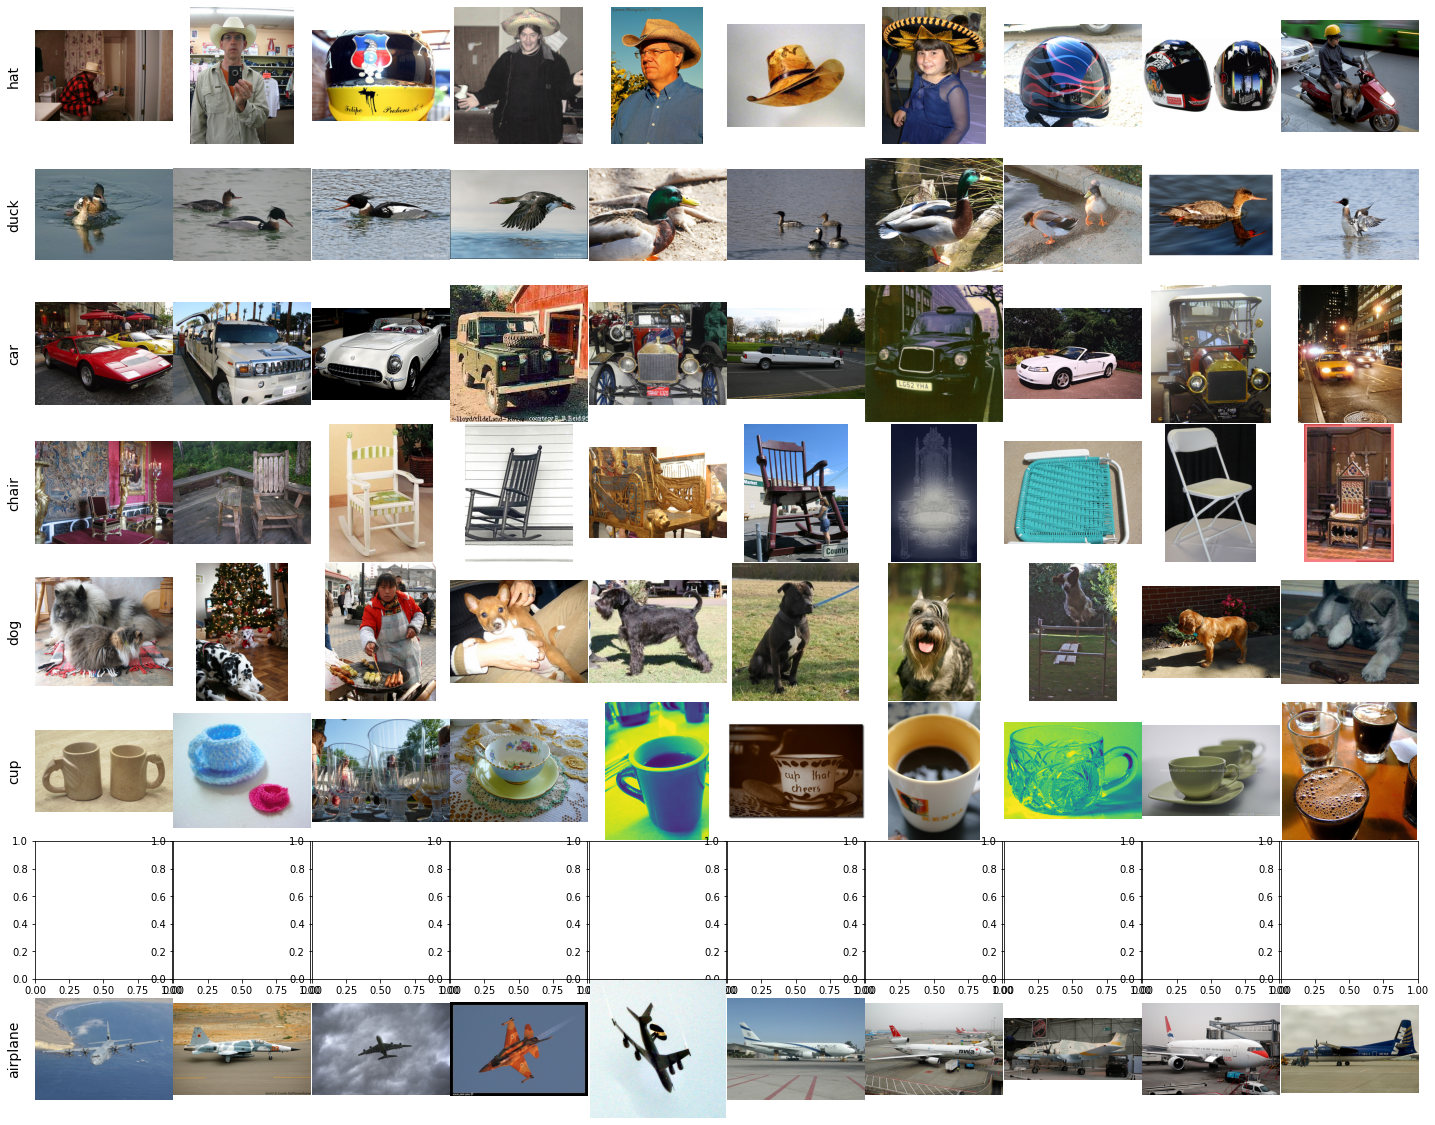

In [15]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image_grid(savedir, num_images_per_class=10, num_cols=10, figsize=(20, 16)):
    categories = os.listdir(savedir)
    num_categories = len(categories)
    
    fig, axes = plt.subplots(num_categories, num_cols, figsize=figsize)
    fig.tight_layout(pad=1.0)
    
    for i, category in enumerate(categories):
        if category=='donkey':
            continue
        category_dir = os.path.join(savedir, category)
        image_files = os.listdir(category_dir)
        print(category_dir)
        print(len(image_files))
        random_images = random.sample(image_files, num_images_per_class)
        
        for j, image_file in enumerate(random_images):
            image_path = os.path.join(category_dir, image_file)
            image = mpimg.imread(image_path)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
        
        axes[i, 0].text(-0.1, 0.5, category, fontsize=14, rotation=90, va='center', ha='right', transform=axes[i, 0].transAxes)
    
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('baby8snapshot.jpg',dpi=100)
    plt.show()

# Example usage
# savedir = 'imagenet_baby8'
plot_image_grid(savedir, num_images_per_class=10, num_cols=10, figsize=(20, 16))